In [27]:
setwd("/home/victor/OneDrive/Online Courses/MITx 15.071x The Analytics Edge")

In [2]:
census = read.csv("Unit4/Unit4/census.csv")
str(census)

'data.frame':	31978 obs. of  13 variables:
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass    : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ maritalstatus: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation   : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race         : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ nativecountry: Factor w/ 41 levels " Cambodia"," Canada",..: 39 39 39 39 5 39 23 39 39 39 ...
 $ over50k      : Fa

In [3]:
library(caTools)

In [4]:
set.seed(2000)
spl = sample.split(census$over50k, SplitRatio = 0.6)
train = subset(census, spl == TRUE)
test = subset(census, spl == FALSE)

In [5]:
censusglm = glm(over50k ~ ., data = train, family = "binomial")
summary(censusglm)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Call:
glm(formula = over50k ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                      

In [6]:
predictTest = predict(censusglm, newdata = test, type = "response")
table(test$over50k, predictTest >= 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

In [7]:
acc = (9051 + 1888)/nrow(test)
acc

[1] 0.8552107

In [8]:
table(train$over50k)


 <=50K   >50K 
 14570   4617 

In [9]:
table(test$over50k)


 <=50K   >50K 
  9713   3078 

In [10]:
acc2 = 9713/nrow(test)
acc2

[1] 0.7593621

In [11]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [12]:
ROCRpredTestLog = prediction(predictTest, test$over50k)
auc = as.numeric(performance(ROCRpredTestLog, "auc")@y.values)
auc

[1] 0.9061598

In [13]:
library("rpart")
library("rpart.plot")

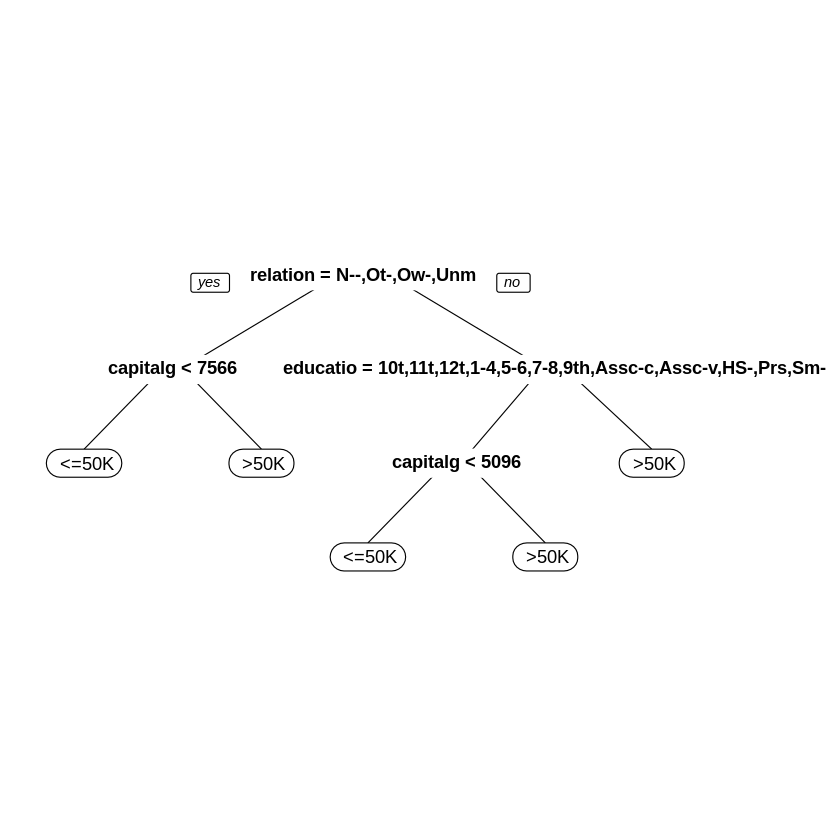

In [14]:
censustree = rpart(over50k ~., data = train, method = "class")
prp(censustree)

In [15]:
predTest = predict(censustree, newdata = test, type = "class")
table(test$over50k, predTest)

        predTest
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

In [16]:
acc = (9243 + 1596)/nrow(test)
acc

[1] 0.8473927

In [17]:
predTest = predict(censustree, newdata = test)
ROCRpredTestTree = prediction(predTest[,2], test$over50k)
auc = as.numeric(performance(ROCRpredTestTree, "auc")@y.values)
auc

[1] 0.8470256

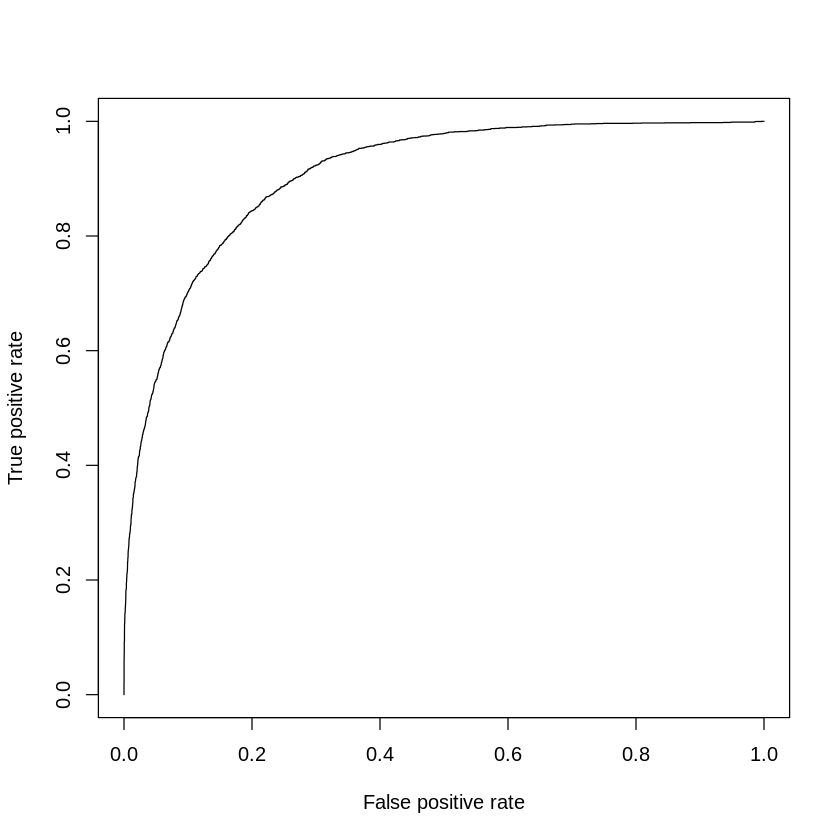

In [18]:
ROCRperfLog = performance(ROCRpredTestLog, "tpr", "fpr")
plot(ROCRperfLog)

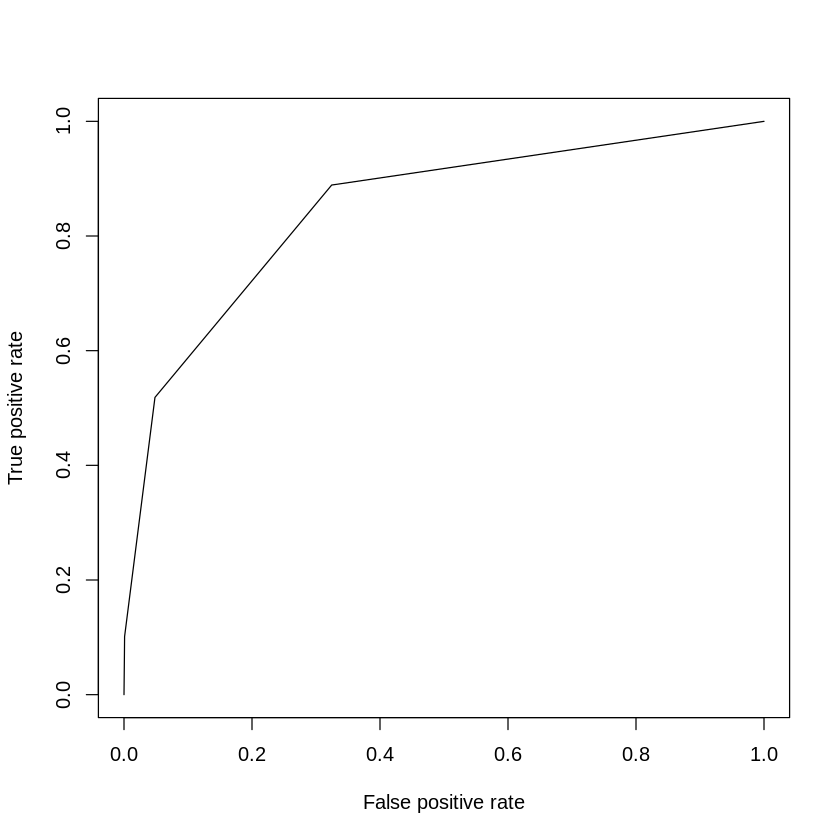

In [19]:
ROCRperfTree = performance(ROCRpredTestTree, "tpr", "fpr")
plot(ROCRperfTree)

In [20]:
set.seed(1)
trainSmall = train[sample(nrow(train), 2000), ]

In [21]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [22]:
set.seed(1)
censusForest = randomForest(over50k ~ ., data = train)

In [23]:
PredictForest = predict(censusForest, newdata = test)
table(test$over50k, PredictForest)

        PredictForest
          <=50K  >50K
   <=50K   9015   698
   >50K    1019  2059

In [24]:
acc = (9015 + 2059)/nrow(test)
acc

[1] 0.865765

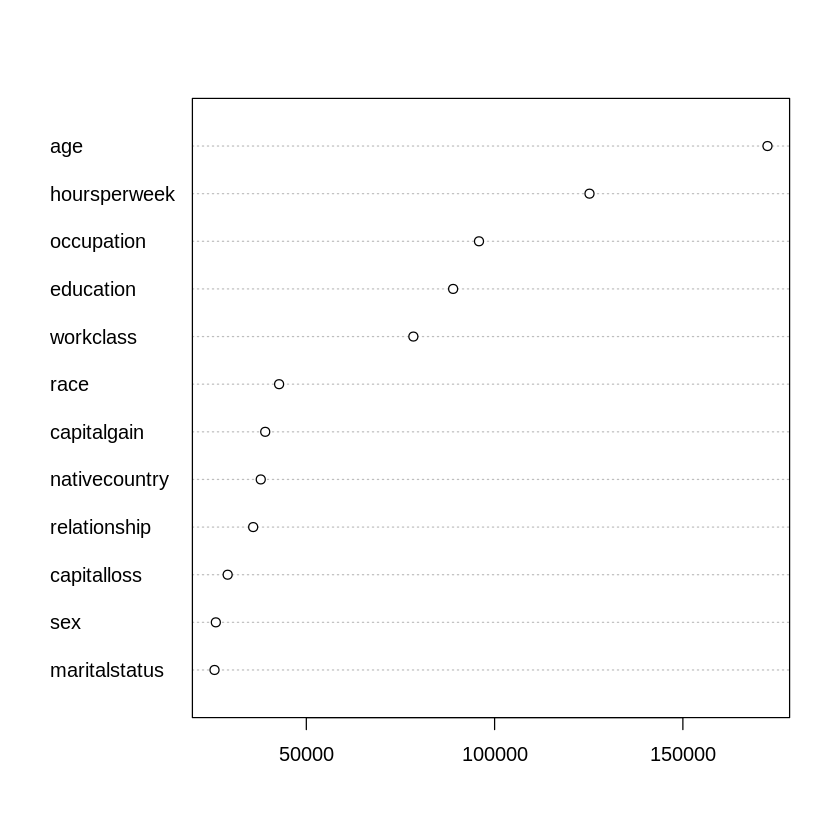

In [25]:
vu = varUsed(censusForest, count=TRUE)
vusorted = sort(vu, decreasing = FALSE, index.return = TRUE)
dotchart(vusorted$x, names(censusForest$forest$xlevels[vusorted$ix]))

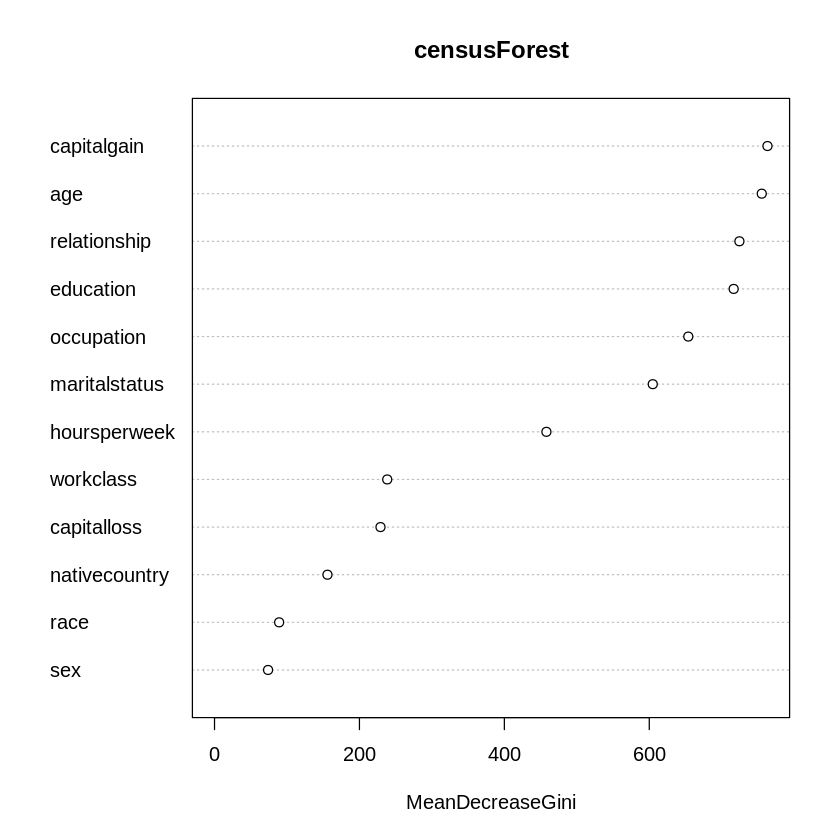

In [26]:
varImpPlot(censusForest)

In [29]:
library(caret)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



In [31]:
set.seed(2)
numFolds = trainControl(method = "cv", number = 10)
cartGrid = expand.grid( .cp = seq(0.002,0.1,0.002))
train(over50k ~. , method = "rpart", data = train, trControl = numFolds, tuneGrid = cartGrid)

CART 

19187 samples
   12 predictor
    2 classes: ' <=50K', ' >50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 17268, 17268, 17269, 17269, 17269, 17268, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa     
  0.002  0.8510972  0.55404931
  0.004  0.8482829  0.55537475
  0.006  0.8452078  0.53914084
  0.008  0.8442176  0.53817486
  0.010  0.8433317  0.53305978
  0.012  0.8433317  0.53305978
  0.014  0.8433317  0.53305978
  0.016  0.8413510  0.52349296
  0.018  0.8400480  0.51528594
  0.020  0.8381193  0.50351272
  0.022  0.8381193  0.50351272
  0.024  0.8381193  0.50351272
  0.026  0.8381193  0.50351272
  0.028  0.8381193  0.50351272
  0.030  0.8381193  0.50351272
  0.032  0.8381193  0.50351272
  0.034  0.8352011  0.48749911
  0.036  0.8326470  0.47340390
  0.038  0.8267570  0.44688035
  0.040  0.8248289  0.43893150
  0.042  0.8248289  0.43893150
  0.044  0.8248289  0.43893150
  0.046  0.8248289  0.43893150
  0.048  

In [33]:
censustreecv = rpart(over50k ~., data = train, method = "class", cp = 0.002)
predcv = predict(censustreecv, newdata = test, type = "class")
table(test$over50k, predcv)

        predcv
          <=50K  >50K
   <=50K   9178   535
   >50K    1240  1838

In [35]:
acc = (9178 + 1838)/nrow(test)
acc

[1] 0.8612306

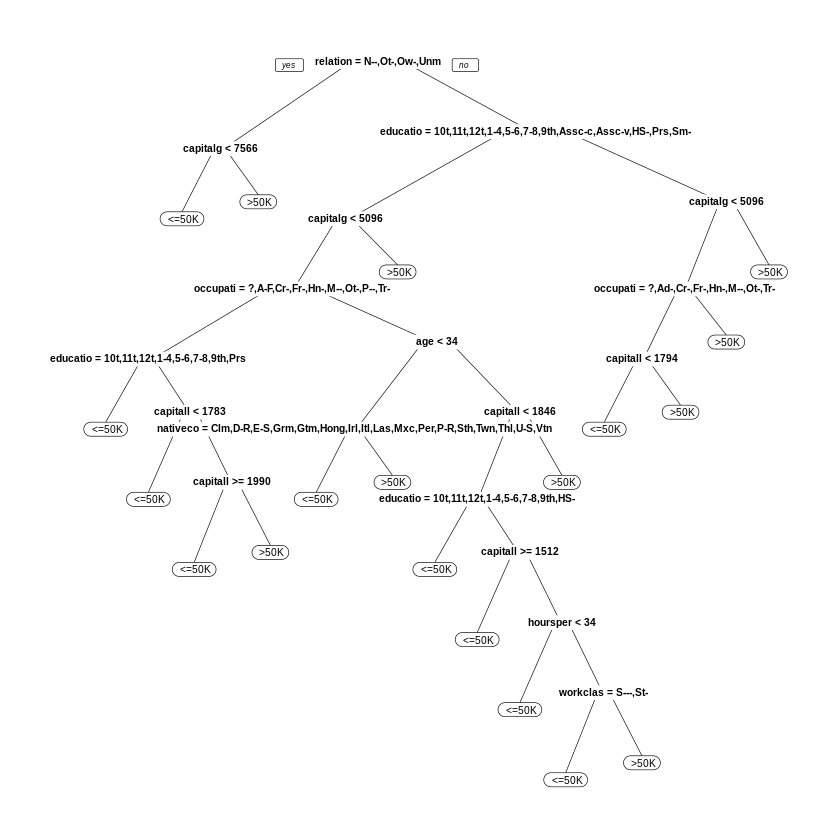

In [36]:
prp(censustreecv)